In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('STB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2018,11750,11700,12000,11700,4.31M,0.0000
1,06/04/2018,12550,12000,12550,12000,7.42M,0.0681
2,06/05/2018,12900,12700,13150,12600,8.11M,0.0279
3,06/06/2018,13300,12800,13450,12700,8.48M,0.0310
4,06/07/2018,13000,13300,13350,12950,7.11M,-0.0226
...,...,...,...,...,...,...,...
1237,05/15/2023,27000,27000,27600,26900,29.85M,0.0075
1238,05/16/2023,27400,27000,27550,27000,13.15M,0.0148
1239,05/17/2023,27000,27400,27500,26900,17.69M,-0.0146
1240,05/18/2023,27200,27150,27500,27000,15.19M,0.0074


In [3]:
#Kiểm tra độ tương quan giữa các cột và lấy cột có tương quan cao nhất để dự đoán 'Price'
features = ['Open', 'High', 'Low']
for i in features:
    correlation = df['Price'].corr(df[i])
    print(i + ": " + str(correlation))


Open: 0.9979540473155362
High: 0.9991014925421863
Low: 0.9990241498897806


In [4]:
#Đọc file dữ liệu chứng khoán và chia train test validate theo tỉ lệ 7:1:2
from sklearn.model_selection import train_test_split
df = pd.read_csv('STB.csv')
df = df[['Price','Open','High','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Chọn các đặc trưng quan sát

train = df['High']
target = df['Price']

train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size


train_data = train[:train_size]
train_target = target[:train_size]
test_data = train[train_size:train_size+test_size]
test_target = target[train_size:train_size+test_size]
val_data = train[train_size+test_size:]
print(val_data)
train_data

993     21750
994     21750
995     22850
996     22750
997     22700
        ...  
1237    27600
1238    27550
1239    27500
1240    27500
1241    27950
Name: High, Length: 249, dtype: int64


0      12000
1      12550
2      13150
3      13450
4      13350
       ...  
616    13750
617    13950
618    14100
619    13900
620    14400
Name: High, Length: 621, dtype: int64

In [5]:
x_train= np.array(train_data).reshape(-1,1)
x_test = np.array(test_data).reshape(-1,1)


rf_model = RandomForestRegressor(n_estimators=600,max_depth = 8, random_state=100)
rf_model.fit(x_train, train_target)

y = test_data
predictions = rf_model.predict(x_test)
print(predictions)
# thres = np.unique([j for i in rf_model.estimators_ for j in i.tree_.threshold])
# np.sort(thres)[-10:]
# print(thres)

# 5. Quá trình Validate
x_val= np.array(val_data).reshape(-1,1)
y_val = np.array(val_data)
y_pred_val =  rf_model.predict(x_val)
print(y_pred_val)

[14081.94074074 13581.61296296 14461.65833333 14260.61666667
 14247.16111111 14260.61666667 14247.16111111 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99166667 14496.99166667 14496.99166667
 14496.99166667 14496.99

In [6]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(np.mean((test_target - predictions)**2))
print(rmse)

12919.491969685389


In [7]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data)


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data)
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the closing prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)

In [8]:
#Dự đoán 30 ngày tiếp theo
y_next_30_days = rf_model.predict(np.array(feature_next_30_days).reshape(-1,1))
print(y_next_30_days)

[10096.41925313 10096.41925313 10096.41925313 10096.41925313
 10096.41925313 10096.41925313 10096.41925313 10096.41925313
 10096.41925313 10096.41925313 10096.41925313 10096.41925313
 10080.81041306 10080.81041306 10080.81041306 10080.81041306
 10080.81041306 10080.81041306 10080.81041306 10080.81041306
 10080.81041306 10080.81041306 10080.81041306 10080.81041306
 10080.81041306 10080.81041306 10080.81041306 10080.81041306
 10080.81041306 10080.81041306]


Validation RMSE: 13147.272010612569
Testing RMSE: 16799.04778881436
Validation MAPE: 54.0569019394755
Testing MAPE: 56.69616591621861
Validation MAE: 12760.720374405077
Testing MAE: 15749.062783976979


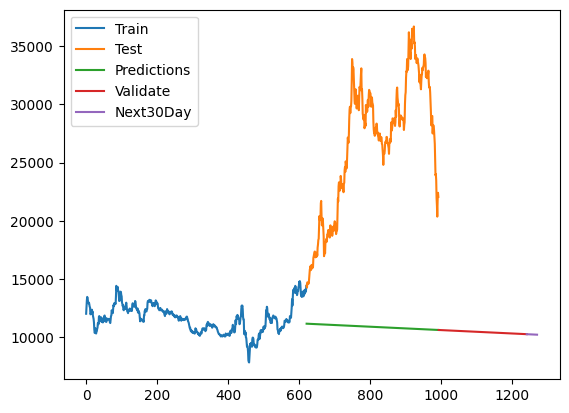

In [9]:
valid_rmse = np.sqrt(np.mean((y_pred_val_ln - y_val_ln)**2))
test_rmse = np.sqrt(np.mean((y_pred_ln - y_test_ln)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

valid_mape = np.mean(np.abs((y_pred_val_ln - y_val_ln) / y_val_ln)) * 100
test_mape = np.mean(np.abs((y_pred_ln - y_test_ln) / y_test_ln)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

valid_mae = np.mean(np.abs(y_pred_val_ln - y_val_ln))
test_mae = np.mean(np.abs(y_pred_ln - y_test_ln))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred_ln)
plt.plot(val_data.index, y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [10]:
import matplotlib.pyplot as plt

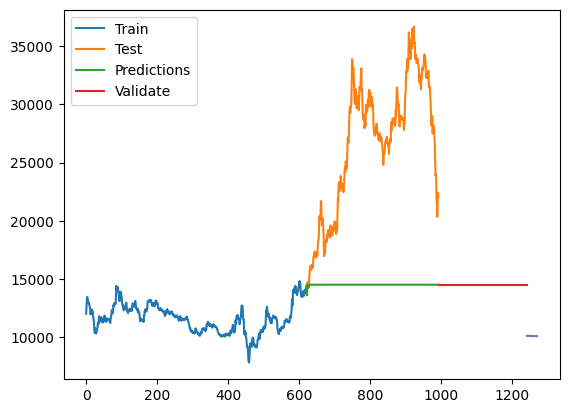

In [11]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, predictions)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()